Dataset loaded successfully with shape: (1460, 5)
   Id  LotArea  FullBath  BedroomAbvGr  SalePrice
0   1     8450         2             3     208500
1   2     9600         2             3     181500
2   3    11250         2             3     223500
3   4     9550         1             3     140000
4   5    14260         2             4     250000
                Id        LotArea     FullBath  BedroomAbvGr      SalePrice
count  1460.000000    1460.000000  1460.000000   1460.000000    1460.000000
mean    730.500000   10516.828082     1.565068      2.866438  180921.195890
std     421.610009    9981.264932     0.550916      0.815778   79442.502883
min       1.000000    1300.000000     0.000000      0.000000   34900.000000
25%     365.750000    7553.500000     1.000000      2.000000  129975.000000
50%     730.500000    9478.500000     2.000000      3.000000  163000.000000
75%    1095.250000   11601.500000     2.000000      3.000000  214000.000000
max    1460.000000  215245.000000     3.00

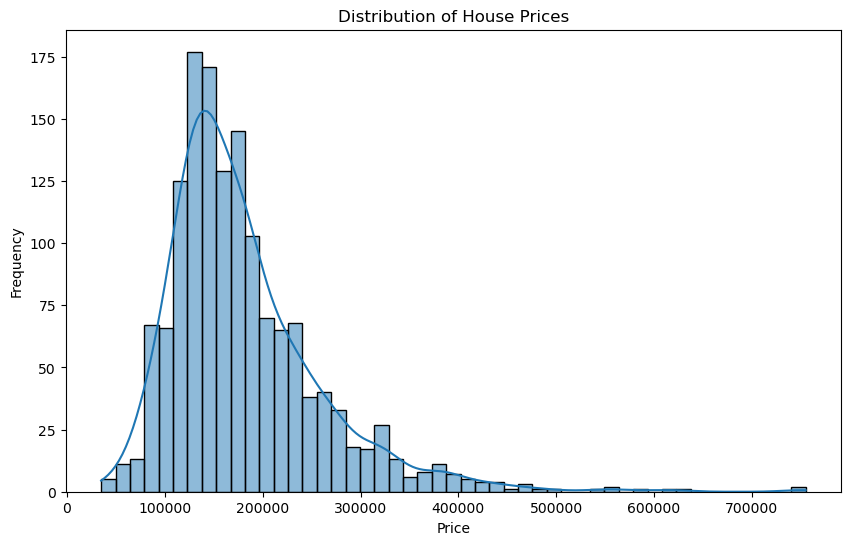

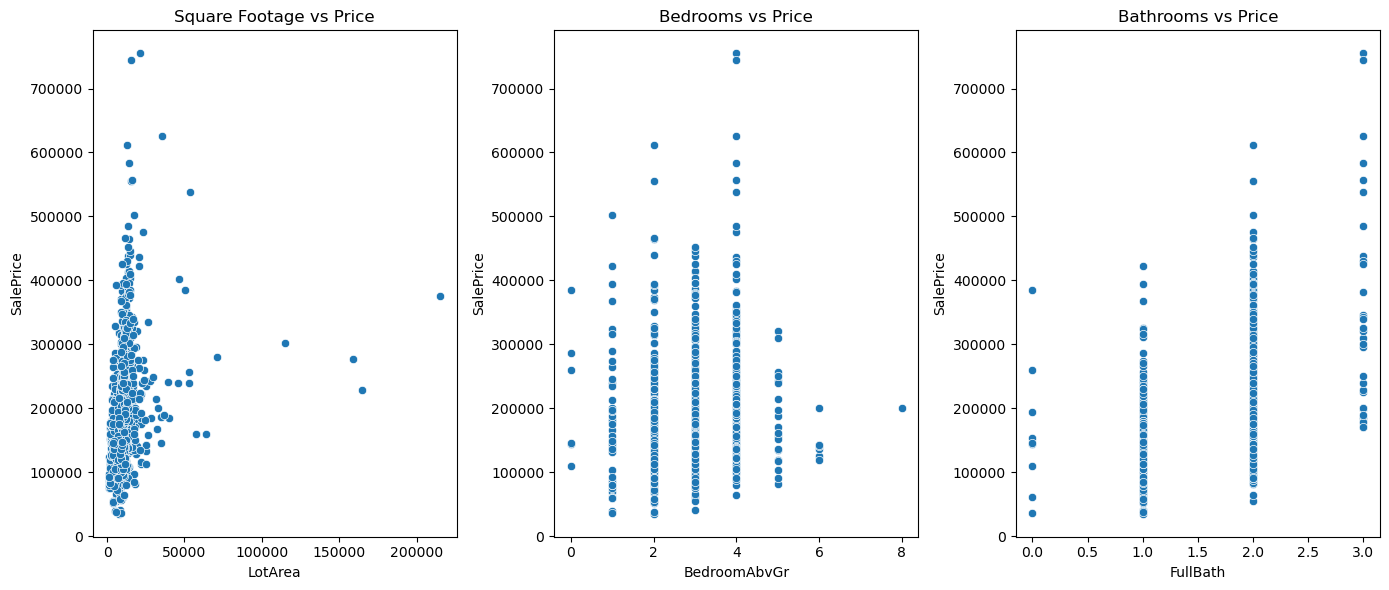

Training set size: 876 samples
Test set size: 584 samples
Mean Squared Error: 4574864955.728282
R^2 Score: 0.36877666210003757


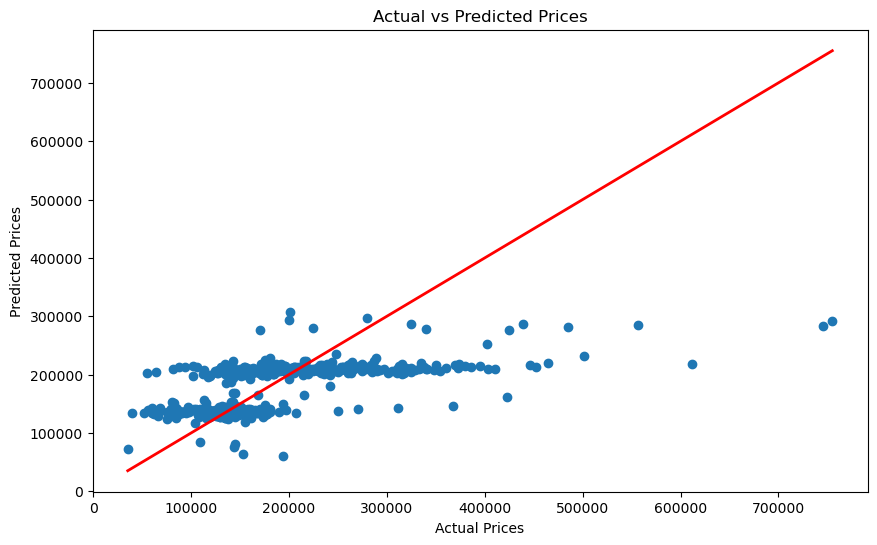

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# 1. Data Exploration
# Load the dataset (assuming a CSV file format for the dataset)
data_path = 'train_h.csv'
try:
    data = pd.read_csv(data_path)
    print(f'Dataset loaded successfully with shape: {data.shape}')
except FileNotFoundError:
    print(f'Error: The file at {data_path} was not found.')
    exit()
except pd.errors.EmptyDataError:
    print(f'Error: The file at {data_path} is empty.')
    exit()

# Display the first few rows of the dataset
print(data.head())

# Display basic statistics of the dataset
print(data.describe())

# Check for missing values
print(data.isnull().sum())

# Ensure there are enough samples
if data.shape[0] == 0:
    print("Error: The dataset is empty.")
    exit()

# 2. Data Visualization
# Plot the distribution of house prices
plt.figure(figsize=(10, 6))
sns.histplot(data['SalePrice'], kde=True)
plt.title('Distribution of House Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

# Plot the relationships between features and the target variable
plt.figure(figsize=(14, 6))

plt.subplot(1, 3, 1)
sns.scatterplot(x='LotArea', y='SalePrice', data=data)
plt.title('Square Footage vs Price')

plt.subplot(1, 3, 2)
sns.scatterplot(x='BedroomAbvGr', y='SalePrice', data=data)
plt.title('Bedrooms vs Price')

plt.subplot(1, 3, 3)
sns.scatterplot(x='FullBath', y='SalePrice', data=data)
plt.title('Bathrooms vs Price')

plt.tight_layout()
plt.show()

# 3. Data Preprocessing
# Drop rows with missing values
data = data.dropna()

# Ensure there are still enough samples after dropping missing values
if data.shape[0] == 0:
    print("Error: No data available after dropping missing values.")
    exit()

# Define features and target variable
X = data[['LotArea', 'BedroomAbvGr', 'FullBath']]
y = data['SalePrice']

# Split the data into training and test sets
# 80% training data and 20% test data
try:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)
    print(f'Training set size: {X_train.shape[0]} samples')
    print(f'Test set size: {X_test.shape[0]} samples')
except ValueError as e:
    print(f'Error during train_test_split: {e}')
    exit()
    


# 4. Model Building
# Initialize the Linear Regression model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')

# Plot the regression line for the test set
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linewidth=2)
plt.title('Actual vs Predicted Prices')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.show()
